In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifelines as lf
import seaborn as sns

In [28]:
# let's get our data
data = pd.read_csv('clean/afib_434_0_clean.csv')
data.describe()

,duration,event,race,sex,age1,age2
count,632576.000000,632576.0,632576.000000,632576.000000,632576.000000,632576.000000
mean,790.748591,1.0,5.188592,0.525793,75.479188,77.498974
std,786.126645,0.0,3.801058,0.499335,11.988344,11.750843
min,1.000000,1.0,1.000000,0.000000,0.000000,-66.000000
25%,121.000000,1.0,1.000000,0.000000,69.000000,71.000000
50%,528.000000,1.0,4.000000,1.000000,78.000000,80.000000
75%,1265.000000,1.0,9.000000,1.000000,84.000000,87.000000
max,7889.000000,1.0,9.000000,1.000000,108.000000,110.000000


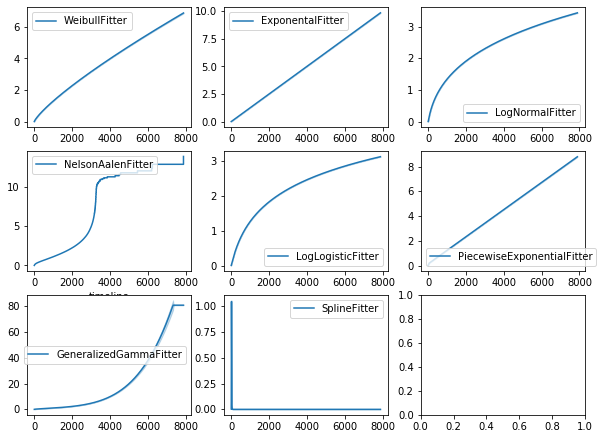

In [9]:
T, E = data['duration'], data['event']

fig, axes = plt.subplots(3, 3, figsize=(10, 7.5))

wbf = lf.WeibullFitter().fit(T, E, label='WeibullFitter')
exf = lf.ExponentialFitter().fit(T, E, label='ExponentalFitter')
lnf = lf.LogNormalFitter().fit(T, E, label='LogNormalFitter')
naf = lf.NelsonAalenFitter().fit(T, E, label='NelsonAalenFitter')
llf = lf.LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = lf.PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
gg = lf.GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')
spf = lf.SplineFitter([6, 20, 40, 75]).fit(T, E, label='SplineFitter')

wbf.plot_cumulative_hazard(ax=axes[0][0])
exf.plot_cumulative_hazard(ax=axes[0][1])
lnf.plot_cumulative_hazard(ax=axes[0][2])
naf.plot_cumulative_hazard(ax=axes[1][0])
llf.plot_cumulative_hazard(ax=axes[1][1])
pwf.plot_cumulative_hazard(ax=axes[1][2])
gg.plot_cumulative_hazard(ax=axes[2][0])
spf.plot_cumulative_hazard(ax=axes[2][1])

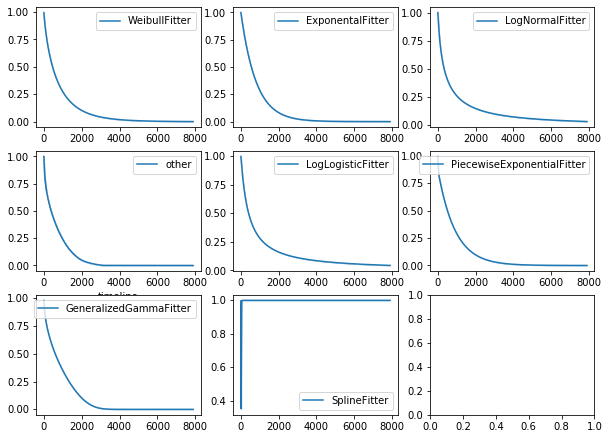

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(10, 7.5))

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
gg.plot_survival_function(ax=axes[2][0])
spf.plot_survival_function(ax=axes[2][1])

NotImplementedError: Distribution not implemented in SciPy

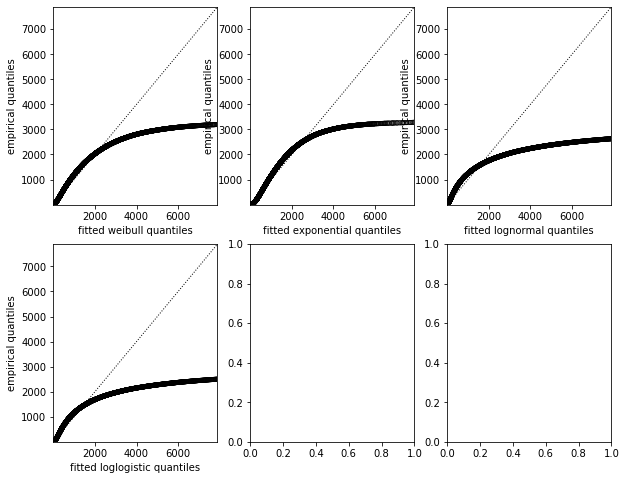

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.reshape(6,)

for i, model in enumerate([wbf, exf, lnf, llf, gg]):
    model.fit(T, E)
    lf.plotting.qq_plot(model, ax=axes[i])

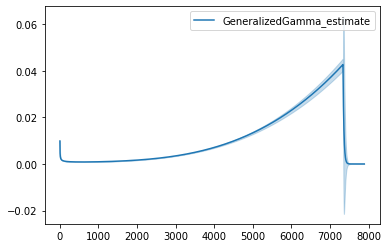

In [15]:
best_model, best_aic_ = lf.utils.find_best_parametric_model(T, E)
best_model.plot_hazard()

In [20]:
data = data.drop('age2', axis=1) # reduce collinearity in dataset
data.head()

,duration,event,race,sex,age1
0,1807.0,1.0,1.0,1.0,62.0
1,1071.0,1.0,4.0,1.0,79.0
2,1686.0,1.0,1.0,1.0,88.0
3,1814.0,1.0,1.0,1.0,81.0
4,307.0,1.0,3.0,0.0,67.0


In [26]:
data['event'].value_counts()

1.0    593586
Name: event, dtype: int64

In [21]:
cph = lf.CoxPHFitter()
cph.fit(data, duration_col='duration', event_col='event', show_progress=True)
cph.print_summary()

Iteration 1: norm_delta = 0.42132, step_size = 0.9500, log_lik = -7297516.68291, newton_decrement = 44361.87992, seconds_since_start = 6.2
Iteration 2: norm_delta = 0.01171, step_size = 0.9500, log_lik = -7254583.02383, newton_decrement = 35.89340, seconds_since_start = 12.3
Iteration 3: norm_delta = 0.00065, step_size = 0.9500, log_lik = -7254547.10368, newton_decrement = 0.11026, seconds_since_start = 18.5
Iteration 4: norm_delta = 0.00000, step_size = 1.0000, log_lik = -7254546.99340, newton_decrement = 0.00000, seconds_since_start = 24.7
Convergence success after 4 iterations.


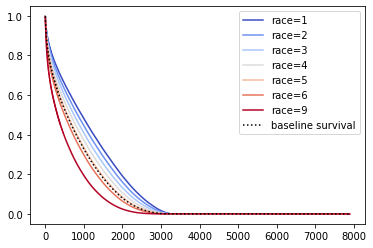

In [25]:
cph.plot_covariate_groups('race', [1,2,3,4,5,6,9], cmap='coolwarm')

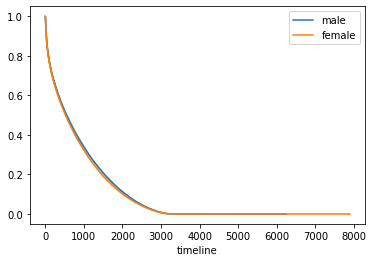

In [4]:
ax = plt.subplot(111)
male = (data['sex'] == 0)
female = (data['sex'] == 1)

kmf.fit(T[male], E[male], label='male')
kmf.plot(ax=ax)

kmf.fit(T[female], E[female], label='female')
kmf.plot(ax=ax)

In [5]:
results = lf.statistics.logrank_test(T[male], T[female], \
                                     E[male], E[female], alpha=.99)
results.print_summary()

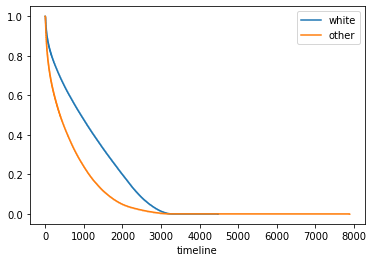

In [6]:
ax = plt.subplot(111)
white = (data['race'] == 1)

kmf.fit(T[white], E[white], label='white')
kmf.plot(ax=ax)

kmf.fit(T[~white], E[~white], label='other')
kmf.plot(ax=ax)

In [7]:
results = lf.statistics.logrank_test(T[male], T[female], \
                                     E[male], E[female], alpha=.99)
results.print_summary()